In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## 1, Examples on Images

In [59]:
# reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#print out the info of image
print('This image is: ', type(image), ' with dimensions: ', image.shape)


This image is:  <class 'numpy.ndarray'>  with dimensions:  (540, 960, 3)


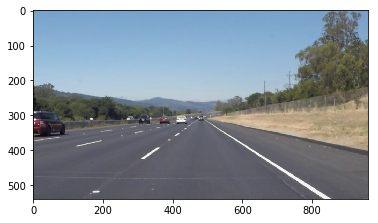

In [60]:
# if you wantes to show a single color channel image called 'gray'
plt.imshow(image, cmap='gray')

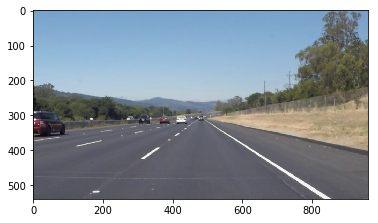

In [61]:
plt.imshow(image)

### Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images  
`cv2.cvtColor()` to grayscale or change color  
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## 2, Functions for Canny Edge Detection

#### 第一步：图片灰度化， cv2.cvtColor(img, cv2.RGB2GARY)

In [62]:
# opencv 灰度转换
def grayscale(image):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    
    # 如果用 cv2.imread() 方法读取图片，应该使用 BGR2GRAY
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray_image

#### 第二步：高斯平滑， cv2.GaussianBlur

In [63]:
# 高斯平滑
def gaussian_blur(gray_image, kernel_size):
    """Applies a Gaussian Noise kernel"""
    
    blur_gray = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)
    return blur_gray

#### 第三步：Canny Edge Detection 边缘检测，cv2.Canny(blur_gray, low_threshold, high_threshold)

In [64]:
def canny_dege_detection(gray_blur, low_threshold, high_threshold):
    """Applies the Canny transform"""
    edges = cv2.Canny(gray_blur, low_threshold, high_threshold)
    return edges

#### 第四步：Region of Masking 感兴趣区域选定

In [65]:
def region_of_interest(image, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    
    mask = np.zeros_like(image)
    
    # defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(image.shape) > 2:
        channel_count = img.shape[2] # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255, ) * channel_count
    else:
        ignore_mask_color = 255
        
    # filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    # returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(image, mask)
    
    return masked_image

#### 第五步：Hough Transform 霍夫变换，cv2.HoughLinesP

In [123]:
def hough_transform_lines(masked_image, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `masked_image` should be the output of a Canny transform.

    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), min_line_len, max_line_gap)
    line_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    draw_lines(line_image, lines)
    return line_image

#### 第六步：Draw Lines

In [124]:
def draw_lines(line_img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).

    Think about things like separating line segments by their
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of
    the lines and extrapolate to the top and bottom of the lane.

    This function draws `lines` with `color` and `thickness`.
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)

#### 第七步：overlay two images

In [91]:
def weighted_image(initial_image, image, apha, beta, rho):
    """
    `image` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.

    `initial_img` should be the image before any processing.

    The result image is computed as follows:

    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_image, apha, image, beta, rho)

## 3, Testing on Images

In [92]:
import os

In [93]:
os.listdir('test_images/')

['solidYellowCurve.jpg',
 'solidYellowLeft.jpg',
 'solidYellowCurve2.jpg',
 'solidWhiteRight.jpg',
 'whiteCarLaneSwitch.jpg',
 'solidWhiteCurve.jpg']

### Build a Lane Finding Pipeline

Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

**Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.**

In [94]:
# create a directory to save processed images
test_images_output = "test_images_output"
if not os.path.exists(test_images_output):
    os.mkdir(test_images_output)

In [95]:
# Build a pipeline that will draw lane lines on the test_images then save them to the test_images_output directory.

# Setting the parameters for functions
# 1. kernel_size for gussian blur
kernel_size = 5

# 2. thresholds for canny edge
low_threshold = 50
high_threshold = 150

# 3. constants for Hough transformation
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 20   # minimum number of votes (intersections in Hough grid cell)
min_line_len = 30 #minimum number of pixels making up a line
max_line_gap = 150    # maximum gap in pixels between connectable line segments

# 4. vertices for polygon with area of interest
left_bottom = [50, 539]
right_bottom = [900, 539]
apex = [470, 320]
vertices = [left_bottom, right_bottom, apex]

# 5. 

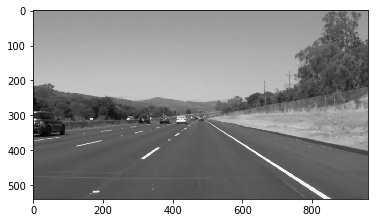

In [110]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')
image_grayscale = grayscale(image)
plt.imshow(image_grayscale, cmap='gray')

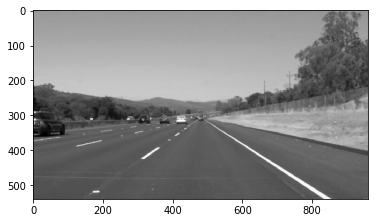

In [111]:
gary_blur = gaussian_blur(image_grayscale, kernel_size)
plt.imshow(gary_blur, cmap='gray')

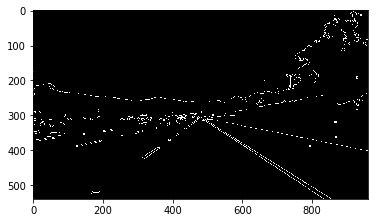

In [112]:
image_canny_edge = canny_dege_detection(gary_blur, low_threshold, high_threshold)
plt.imshow(image_canny_edge, cmap='gray')

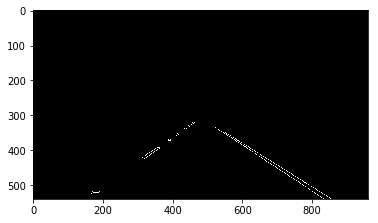

In [117]:
vertices = np.array([[(0,image.shape[0]),(450, 320), (490, 320), (image.shape[1],image.shape[0])]], dtype=np.int32)
image_mask = region_of_interest(image_canny_edge, vertices)
plt.imshow(image_mask, cmap='gray')

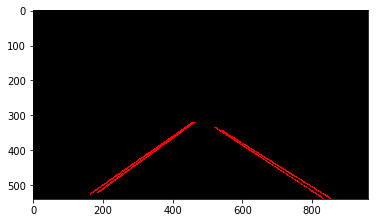

In [128]:
line_image = hough_transform_lines(image_mask, rho, theta, threshold, min_line_len, max_line_gap)
plt.imshow(line_image, cmap='gray')

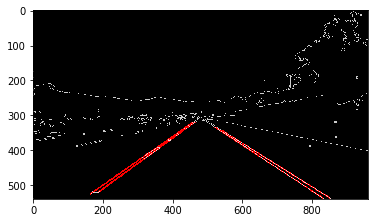

In [129]:
color_edges = np.dstack((image_canny_edge, image_canny_edge, image_canny_edge))
image_lines_and_edges = weighted_image(color_edges, line_image, 0.8, 1.0, 0)
plt.imshow(image_lines_and_edges, cmap='gray')

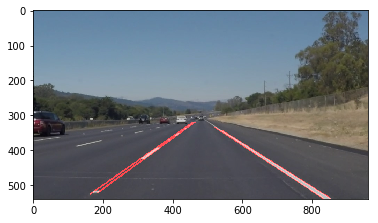

In [131]:
image_lines_and_edges = weighted_image(image, line_image, 0.8, 1.0, 0)
plt.imshow(image_lines_and_edges)

### 构建车道检测处理流程

In [136]:
def finding_lane_pipe(image):
    
    # 1, Convert GrayScale （1）对原始图像进行灰度化
    image_grayscale = grayscale(image)
    
    # 2, Gaussian Bluring （2）高斯滤波
    gary_blur = gaussian_blur(image_grayscale, kernel_size)
    
    # 3, Canny edge decetion
    image_canny_edge = canny_dege_detection(gary_blur, low_threshold, high_threshold)
    
    
    # 4, Mask edges to area of interest
    vertices = np.array([[(0,image.shape[0]),(450, 320), (490, 320), (image.shape[1],image.shape[0])]], dtype=np.int32)
    image_mask = region_of_interest(image_canny_edge, vertices)
    
    # 5, Detect Hough Lines 
    # and, Draw the lines on the edge image
    line_image = hough_transform_lines(image_mask, rho, theta, threshold, min_line_len, max_line_gap)
    
    
    # 6, weighted_image(initial_image, image, apha, beta, rho):
    # Create a "color" binary image to combine with line image
    # color_edges = np.dstack((image_canny_edge, image_canny_edge, image_canny_edge))
    image_lines_and_edges = weighted_image(image, line_image, 0.8, 1.0, 0)
    
    return image_lines_and_edges
    

In [137]:
# testing on images

In [138]:
images = os.listdir('test_images/')

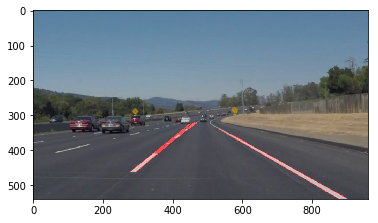

In [139]:
for raw_image in images:
    image = mpimg.imread("test_images/" + raw_image)
    
    image_with_line = finding_lane_pipe(image)
    
    # show the processed image
    plt.imshow(image_with_line)
    
    # save the processed image to test_images_output dir
    mpimg.imsave(os.path.join(test_images_output, "processed_"+raw_image), image_with_line)

## 4, Testing on Videos

In [167]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    result = finding_lane_pipe(image)
    return result

In [168]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [169]:
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
print(clip1)

In [170]:
# create a directory to save processed videos
test_videos_output = "test_videos_output"
if not os.path.exists(test_videos_output):
    os.mkdir(test_videos_output)

In [171]:

white_output = 'test_videos_output/solidWhiteRight.mp4'
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:01<00:00, 118.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 1.53 s, sys: 265 ms, total: 1.79 s
Wall time: 2.19 s


In [172]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [173]:
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')

In [174]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:06<00:00, 101.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 5.33 s, sys: 880 ms, total: 6.21 s
Wall time: 7.08 s


In [176]:
#%%
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

In [177]:
clip3 = VideoFileClip('test_videos/challenge.mp4')

In [180]:
challenge_output = 'test_videos_output/challenge.mp4'
# challenge_clip = clip3.fl_image(process_image)
# %time challenge_clip.write_videofile(challenge_output, audio=False)